In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# [Step1. 탐색] : Titanic 데이터 살펴보기


### [Titanic 데이터셋의 기본 정보]
##### 데이터 피처 설명
- pclass : Passenger Class, 승객 등급
- survived : 생존 여부
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 탑승 한 형제/배우자 수
- parch : 탑승 한 부모/자녀 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
- body : 사망자 확인 번호
- home.dest : 고향/목적지

In [10]:
df_train = pd.read_csv("../data/titanic_train.csv")
df_test = pd.read_csv("../data/titanic_test.csv")
df_train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
pclass       916 non-null int64
survived     916 non-null int64
name         916 non-null object
sex          916 non-null object
age          741 non-null float64
sibsp        916 non-null int64
parch        916 non-null int64
ticket       916 non-null object
fare         916 non-null float64
cabin        214 non-null object
embarked     914 non-null object
body         85 non-null float64
home.dest    527 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 93.1+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
pclass       393 non-null int64
survived     393 non-null int64
name         393 non-null object
sex          393 non-null object
age          305 non-null float64
sibsp        393 non-null int64
parch        393 non-null int64
ticket       393 non-null object
fare         393 non-null float64
cabin        81 non-null object
embarked     393 non-null object
body         36 non-null float64
home.dest    218 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


In [13]:
df_train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [14]:
#불필요한 피처 제거 - 당장 분석에 활용 불가(name, cabin), 큰 의미를 가지고 있지 않은 피처(ticket, home.dest, body)
df_train = df_train.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis=1)
df_test = df_test.drop(['name','ticket','body','cabin','home.dest'], axis=1)

### [탐색적 데이터 분석]
    데이터를 그룹(생존자 그룹 / 비생존자 그룹)으로 나누어 피처의 그룹 간 차이를 탐색
    생존 여부(생존 = 1, 아닌 경우 = 0)인 survived를 그룹으로 하여 pclass 피처의 그룹별 분포를 출력

0    563
1    353
Name: survived, dtype: int64


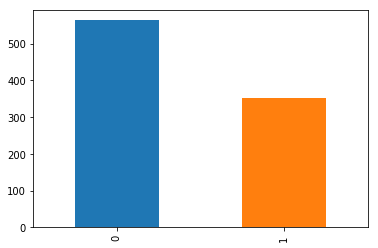

In [18]:
print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar()

#### survived 피처를 기준으로 그룹을 나누어 그룹별 pclass 피처의 분포를 살펴보자.

3    498
1    230
2    188
Name: pclass, dtype: int64


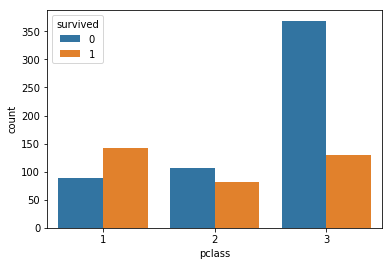

In [20]:
print(df_train['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue = 'survived',  data = df_train)

#### 그룹 비율은 약 3:5 정도로 나타났고, 그룹별 pclass 분포는 상이하게 나타났다. pclass 피처는 생존자 분류에 유의미한 영향을 미친다는 가설을 세울 수 있다.

In [24]:
from scipy import stats

In [44]:
# 두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수를 정의
def valid_features(df, col_name, distribution_check = True):
    # 두 집단(survived=1, 0)의 분포 그래프를 출력
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)
    
    # 두 집단의 표준편차를 출력
    titanic_survived = df[df['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_survived_static))
    titanic_n_survived = df[df['survived']==0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_n_survived_static))
    
    #T-test로 두 집단의 평균 차이를 검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var=False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)
    
    #Shapiro-Wilk 검정 : 분포의 정규성 정도를 검증
    if distribution_check:
        print("The w-statistic and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_survived[col_name]))
        print("The w-statistic and p-value in Non-Survived %.3f and %.3f" % stats.shapiro(titanic_n_survived[col_name]))

data std is 14.22
data std is 13.71
The t-statistic and p-value assuming equal variances is -0.546 and 0.585.
The t-statistic and p-value not assuming equal variances is -0.543 and 0.587
The w-statistic and p-value in Survived 0.982 and 0.001
The w-statistic and p-value in Non-Survived 0.968 and 0.000
data std is 0.64
data std is 1.34
The t-statistic and p-value assuming equal variances is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015
The w-statistic and p-value in Survived 0.656 and 0.000
The w-statistic and p-value in Non-Survived 0.492 and 0.000


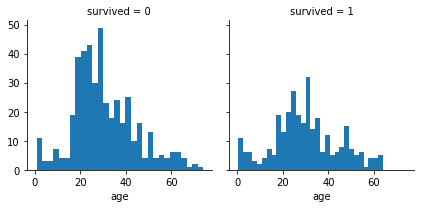

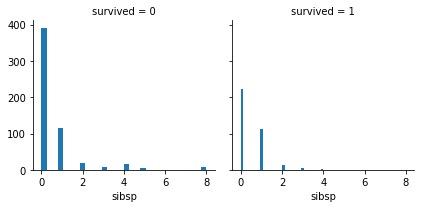

In [45]:
#valid_features 함수 실행, age 피처와 sibsp 피처 탐색
valid_features(df_train[df_train['age'] > 0], 'age', distribution_check=True)
valid_features(df_train, 'sibsp', distribution_check=True)

### age 피처는 두 그룹 간의 평균 차이가 없기 때문에 생존자 분류에 미치는 영향력이 낮을 것이라고 가정할 수 있음
### sibsp 피처에서는 두 그룹 간의 평균 차이가 어느 정도 존재

### `[미니 퀴즈 - 4.1]`
- `parch, fare, sex, embarked 피처에 대해 (생존자/비생존자) 간의 차이를 탐색해 보세요.` 
    - 위에서와 동일한 방법를 이용하여 생존자와 비생존자 그룹간의 평균과 분포가 어떻게 다른지, 혹은 통계적 유의성이 얼마나 있는지 대해 살펴보도록 합시다.

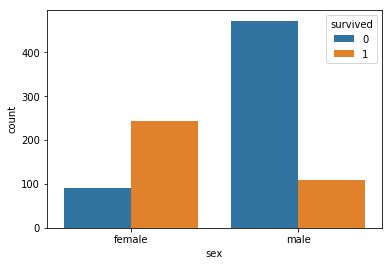

In [46]:
ax = sns.countplot(x='sex', hue = 'survived',  data = df_train)
# 남/여에서 생존자 비율이 크게 차이난다.

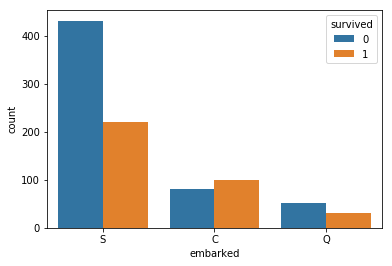

In [47]:
ax = sns.countplot(x='embarked', hue = 'survived',  data = df_train)
# 3개의 승선항에 따라 비율이 다르다

data std is 0.74
data std is 0.89
The t-statistic and p-value assuming equal variances is 1.865 and 0.063.
The t-statistic and p-value not assuming equal variances is 1.942 and 0.052
data std is 60.68
data std is 33.65
The t-statistic and p-value assuming equal variances is 7.523 and 0.000.
The t-statistic and p-value not assuming equal variances is 6.657 and 0.000


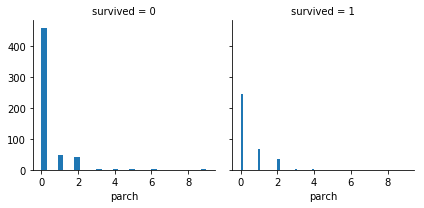

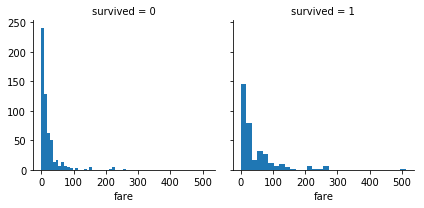

In [48]:
valid_features(df_train, 'parch', distribution_check=False)
valid_features(df_train, 'fare', distribution_check=False)

In [50]:
#parch에서는 편차에 약간의 차이가 있고, t-test 결과 평균에도 약간의 차이가 있다.
#fare에서는 편차에 많은 차이가 있고, t-test 결과 평균도 차이가 있다.

----
# [Step2. 분류] : 생존자 분류 모델 만들기

### [분류 모델을 위한 전처리]
#### 로지스틱 회귀 모델
    로지스틱 회귀 모델은 기존 회귀 분석의 예측값 Y를 0~1 사이의 값으로 제한하여 0.5보다 크면 1, 0.5보다 작으면 0이라고 분류하는 방법이다.
    로지스틱 회귀 모델은 일반적인 회귀 모델과 마찬가지로 계수 분석을 통한 피처의 영향력 해석이 용이하다는 장점이 있다.
    로지스틱 모델을 사용하기 위해 회귀 분석을 수행할 때와 동일한 방법으로 데이터를 가공한다.
    
    우선 결측값을 처리 - 결측값이 존재하는 피처를 전처리하는 방법은 크게 두가지
    1. 결측이 존재하는 데이터들을 삭제, 2. 평균값, 중앙값이나 최빈값 등의 임의의 수치로 채워 넣는 방법
    1은 처리가 쉽고 분석에서의 주관이 개입될 여지가 없다는 장점, 중요한 정보를 삭제할 가능성이 있다는 단점
    2는 데이터를 모두 분석에 활용할 수 있다는 장점, 수치 왜곡의 가능성이 있다는 단점
    
    아래 코드는 2번을 이용하여 age와 embark 피처의 결측값을 보정함. 그리고 원-핫 인코딩 방법으로 범주형 변수를 변환
    현재 데이터셋은 train, test 데이터로 분리되어있기 때문에 데이터를 합친 whole_df에 원-핫 인코딩 적용한 뒤, 분리
   

In [53]:
#age의 결측값을 평균값으로 대체
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

#embark: 2개의 결측값을 최빈값으로 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

In [54]:
#원-핫 인코딩을 위해 통합 데이터 프레임 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

In [55]:
#pandas 패키지를 이용한 원-핫 인코딩 수행
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


### [분류 모델링]

##### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [58]:
# 데이터를 학습 데이터셋, 테스트 데이터셋으로 분리
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

In [62]:
#로지스틱 회귀 모델을 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
# 학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

##### 분류 모델 평가
##### 분류 모델의 여러가지 평가 방법들

    일반적으로 분류 모델의 평가 기준은 Confusion Matrix라는 것을 활용한다. (TP, FN / FP, TN)
    정확도 = TP + TN / TP+TN+FP+FN     전체 중에서 잘 예측한 것
    정밀도(Precision) = TP / TP+FP     예측한 것 중에서 실제로 맞는 것
    재현도(Recall) = TP / TP+FN        실제 값 중에서 예측 성공한 것
    특이도(Specificity) = TN / TN+FP
    F1-score = 정밀도와 재현도의 조화 평균값으로, 두 값을 동시에 고려할 때 사용하는 지표

In [67]:
# 테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.80
Precision : 0.756
Recall : 0.673
F1 : 0.712


In [68]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix를 출력
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[214  32]
 [ 48  99]]


##### Logistic Regression model AUC
    ROC Curve는 재현도(민감도)와 특이도를 고려하여 종합적인 모델의 성능을 그래프로 표현, 이 그래프의 넓이를 계산한 것이 AUC
    이 값이 1에 가까울수록 좋은 분류 모델이다.
    AUC 출력은 분류 결과인 0 혹은 1의 y값(y_pred)을 사용하는 것이 아니라, 분류 직전의 확률값(y_pred_probability)인 0~1 사이의 값을 사용해야 한다.
    아래 코드는 AUC를 출력함과 동시에 ROC Curve를 그래프로 나타낸 것이다.

AUC : 0.837


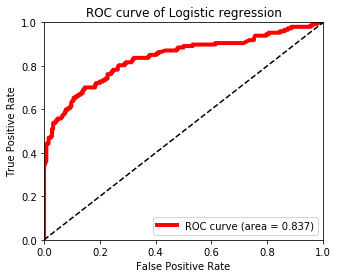

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC (Area Under the Curve)를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

### 이 모델의 AUC는 약 0.837으로, 생존자를 잘 분류해내는 모델이라고 평가할 수 있다.

### Decision Tree
    의사결정 나무 모델은 피처 단위로 조건을 분기하여 정답의 집합을 좁혀나가는 방법이다. 마치 스무고개놀이에서 정답을 찾아 나가는 과정과 유사하며, 이를 도식화하면 생김새가 '나무 모양'과 같다 하여 붙여진 이름이다.

In [70]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred_probability = dtc.predict_proba(x_test)[:,1]

# 학습한 모델의 성능을 계산하여 출력
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.77
Precision : 0.706
Recall : 0.653
F1 : 0.678


AUC : 0.754


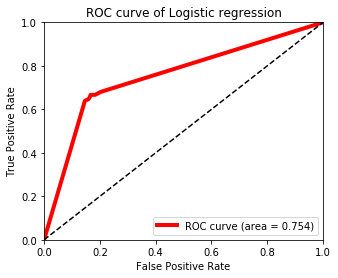

In [71]:
# 학습한 모델의 AUC를 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

#### --> 로지스틱 회귀 모델에 비해 모든 평가 지표가 낮은 것을 확인할 수 있다.

----
# [Step 3 모델개선] : 피처 엔지니어링 첫걸음

### 분류 모델의 성능을 더욱 끌어올리기 위해서 더 좋은 분류 기법 사용
### 피처 엔지니어링이란 모델에 사용할 피처를 가공하는 분석 작업을 의미한다. 이를 수행하기 위해 분석 과정을 처음부터 다시 시작 
### + 이번에는 cabin 피처와 name 피처를 가공하여 분석에 포함한다.
### [피처에서 새로운 의미 추출해내기]

In [72]:
# 데이터를 다시 불러옵니다.
df_train = pd.read_csv("../data/titanic_train.csv")
df_test = pd.read_csv("../data/titanic_test.csv")
df_train = df_train.drop(['ticket', 'body', 'home.dest'], axis=1)
df_test = df_test.drop(['ticket', 'body', 'home.dest'], axis=1)

In [73]:
# age의 결측값을 평균값으로 대체
replace_mean = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

# embark : 2개의 결측값을 최빈값으로 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

# one-hot encoding을 위한 통합 데이터 프레임(whole_df)을 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

##### cabin 피처 활용하기  - cabin 피처는 선실의 정보를 나타내는 데이터로, 선실을 대표하는 알파벳이 반드시 첫 글자에 등장하는 패턴을 가짐.

In [74]:
print(whole_df['cabin'].value_counts()[:10])

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
C22 C26            4
F2                 4
B96 B98            4
D                  4
C78                4
Name: cabin, dtype: int64


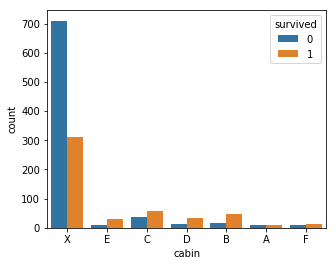

In [75]:
# 결측 데이터의 경우는 ‘X’로 대체
whole_df['cabin'] = whole_df['cabin'].fillna('X')

# cabin 피처의 첫 번째 문자를 추출
whole_df['cabin'] = whole_df['cabin'].apply(lambda x: x[0])

# 추출한 문자 중, G와 T는 수가 너무 작기 때문에, 마찬가지로 ‘X’로 대체
whole_df['cabin'] = whole_df['cabin'].replace({"G":"X", "T":"X"})

ax = sns.countplot(x='cabin', hue = 'survived',  data = whole_df)
plt.show()

### cabin 피처의 생존자/비생존자 그룹 간 분포. 두 그룹 간의 유의미한 차이가 있는 것으로 보임.
##### name 피처 활용하기 - 데이터 간의 공통점인 호칭(miss, mr, mrs ...등등) 활용

In [76]:
# 이름에서 호칭을 추출
name_grade = whole_df['name'].apply(lambda x : x.split(", ",1)[1].split(".")[0])
name_grade = name_grade.unique().tolist()
print(name_grade)

['Miss', 'Mr', 'Master', 'Mrs', 'Dr', 'Mlle', 'Col', 'Rev', 'Ms', 'Mme', 'Sir', 'the Countess', 'Dona', 'Jonkheer', 'Lady', 'Major', 'Don', 'Capt']


In [77]:
# 호칭에 따라 사회적 지위(1910년대 기준)를 정의
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], # 명예직
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성
              'C': ['Jonkheer', 'the Countess'], # 귀족이나 작위
              'D': ['Mr', 'Don'], # 남성
              'E': ['Master'], # 젊은남성
              'F': ['Miss', 'Mlle', 'Lady']} # 젊은 여성

# 정의한 호칭의 기준에 따라, A~F의 문자로 name 피처를 다시 정의하는 함수
def give_grade(x):
    grade = x.split(", ", 1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'
    
# 위의 함수를 적용하여 name 피처를 새롭게 정의
whole_df['name'] = whole_df['name'].apply(lambda x: give_grade(x))
print(whole_df['name'].value_counts())

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64


### `[미니 퀴즈 - 4.2]`
- `‘cabin’ 피처와 마찬가지로, ‘name’ 피처에 대해 (생존자/비생존) 그룹 간의 차이를 탐색해 보세요.` 
    - 위와 동일한 방법을 이용하여 생존자와 비생존자 그룹간의 분포가 어떻게 다른지, 시각적으로 탐색해보도록 합시다.

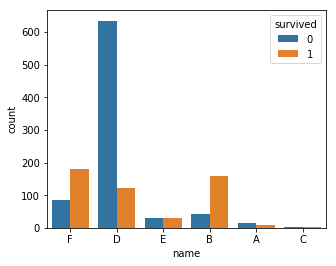

In [78]:
ax = sns.countplot(x='name', hue = 'survived',  data = whole_df)
plt.show()

##### one-hot encoding

In [79]:
# pandas 패키지를 이용한 one-hot 인코딩을 수행
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]
df_train.head()

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,23.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,13.8583,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,7.7250,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


##### 피처 엔지니어링이 완료된 데이터셋 학습

In [80]:
# 데이터를 학습 데이터셋, 테스트 데이터셋으로 분리
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

# 로지스틱 회귀 모델을 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

# 학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

# 테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred)) # AUC (Area Under the Curve) & ROC curve

accuracy: 0.79
Precision : 0.736
Recall : 0.701
F1 : 0.718


AUC : 0.853


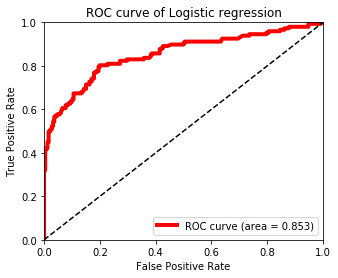

In [81]:
# AUC (Area Under the Curve)를 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

### 실행 결과, accuracy와 precision은 기존 모델에 비해 소폭 감소한 반면, Recall, F1-score, AUC는 상승하였다.
### 이를 통해 분류 모델의 성능이 많이 향상되었다는 것을 알 수 있다.

### [피처 영향력 살펴보기] - 그래프로

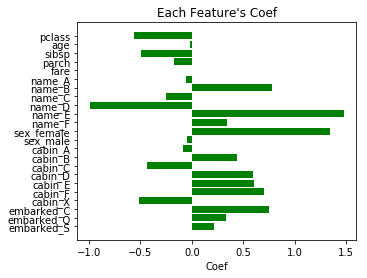

In [83]:
# 예측 대상인 survived 피처를 제외한 모든 피처를 리스트로 반환 (그래프의 y축)
cols = df_train.columns.tolist()
cols.remove('survived')
y_pos = np.arange(len(cols))

# 각 피처별 회귀 분석 계수를 그래프의 x축으로 하여, 피처 영향력 그래프를 출력
plt.rcParams['figure.figsize'] = [5, 4]
fig, ax = plt.subplots()
ax.barh(y_pos, lr.coef_[0], align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('Coef')
ax.set_title("Each Feature's Coef")

plt.show()

### 실행 결과, 피처 엔지니어링으로 생성된 name, cabin 피처의 영향력이 가장 크다는 것을 알 수 있다.

# [Step4. 평가] : 모델 검증하기

### 모델의 과적합 여부를 검증해야함. 방법은 1. K-fold 교차 검증, 2. 학습 곡선을 살펴보는 방법. 2가지이다.
### [K-fold 교차 검증 수행하기]
- K-fold 교차 검증을 통한 과적합 검증
- sklearn.model_selection의 KFold 클래스로 cv라는 객체를 반환, 이 객체의 split함수를 for 반복문과 같이 사용하는데, 반복문에서는 전체 데이터를 k개로 분리하여 학습과 평가를 반복한다.

In [84]:
from sklearn.model_selection import KFold

# K-fold 교차 검증의 k를 5로 설정
k = 5
cv = KFold(k, shuffle=True, random_state=0)
acc_history = []

# K-fold를 5번의 분할 학습으로 반복
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):

    # 5개로 분할된 fold 중 4개를 학습 데이터셋, 1개를 테스트 데이터셋으로 지정. 매 반복시마다, 테스트 데이터셋은 변경됨.
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]
    
    # survived 피처를 y, 나머지 피처들을 x 데이터로 지정
    splited_x_train, splited_y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
    splited_x_test, splited_y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values
    
    # 주어진 데이터로 로지스틱 회귀 모델을 학습
    lr = LogisticRegression(random_state=0)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    
    # 테스트 데이터셋의 Accuracy를 계산하여 acc_history에 저장
    splited_acc = accuracy_score(splited_y_test, y_pred)
    acc_history.append(splited_acc)

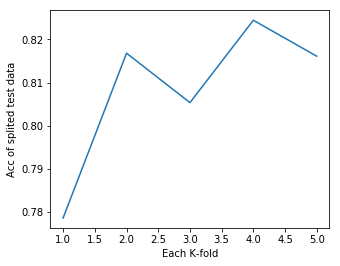

In [85]:
# acc_history에 저장된 5번의 학습 결과(Accuracy)를 그래프로 출력
plt.xlabel("Each K-fold")
plt.ylabel("Acc of splited test data")
plt.plot(range(1, k+1), acc_history)

### 교차 검증의 k번째 실행마다 AUC를 리스트에 저장하고, 이를 그래프로 나타낸 것이다. 그래프를 보면, AUC가 큰 폭으로 변화하고 있는 것을 볼 수 있다. 따라서 이 모델은 다소 불안정한 모델
### 이러한 결과는 데이터 수가 적기 때문에 발생하는 현상. 

### [학습 곡선 분석하기]

In [86]:
!pip install scikit-plot

You are using pip version 9.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


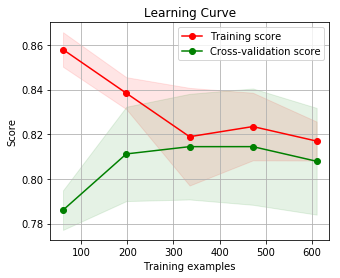

In [87]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()

### 이 그래프는 학습 데이터 샘플의 개수가 증가함에 다라 학습과 테스트 두 점수가 어떻게 변화하는지를 관찰한 그래프이다.
### 이를 통해 데이터가 300개 이상인 경우에는 과적합의 위험이 낮아진다는 것을 알 수 있다.